<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/AI_T7_31_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

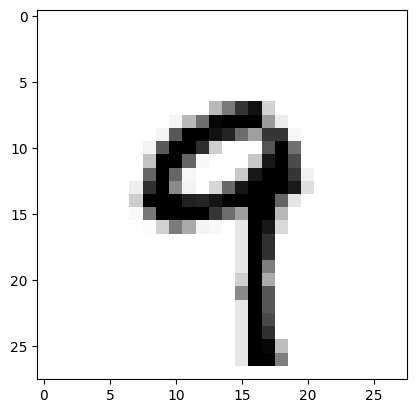

Số 9


In [ ]:
digit = train_images[812]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print('Số', train_labels[812])

<ipython-input-134-00a11e499f9c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


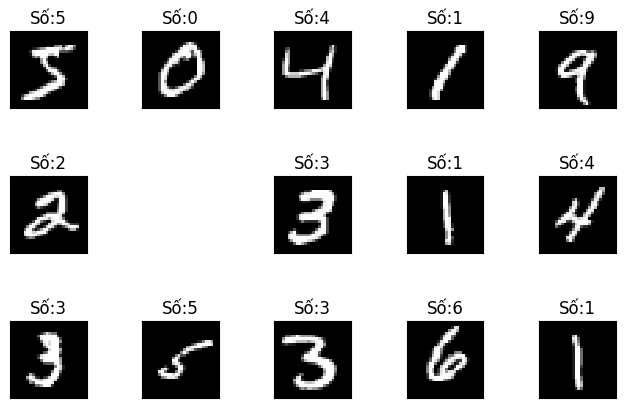

In [ ]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation="none")
  plt.title("Số:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape = (28*28,)))
model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = test_images
y = test_labels

In [ ]:
train_images= train_images.reshape(60000,28*28)
train_images= train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2607 - accuracy: 0.9246
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1070 - accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0698 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0383 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0288 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0162 - accuracy: 0.9958
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0593 - accurac

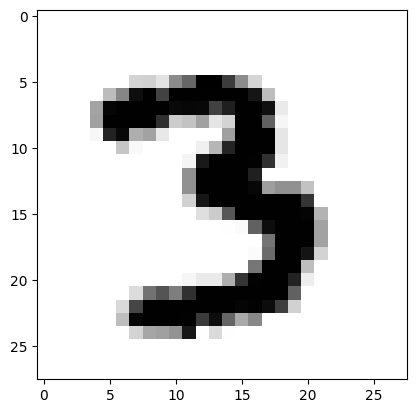

Số 3


In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
digit = test_images[500]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print('Số', test_labels[500])

In [ ]:
x_pred = x[500].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
y_pred = model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 24ms/step
[[4.4813677e-21 8.5490167e-16 4.5231952e-14 1.0000000e+00 1.6030353e-19
  7.6137366e-13 8.2846622e-24 2.1127553e-16 6.2844754e-13 4.3386419e-12]]


In [ ]:
import numpy as np
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 70ms/step


array([3])

In [ ]:
x_pred = x[600].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
y_pred = model.predict(x_pred)
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 22ms/step


array([6])